In [37]:
import pandas as pd
import numpy as np

In [38]:
df_titanic = pd.read_csv('../csv/titanic.csv')
df_titanic.shape

(1309, 12)

In [39]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,08.05,NaN,S


    Passengerid: ID do passageiro do navio (código primário).
    Survived: Se sobreviveu ao naufrágio estará como 1 e caso esteja com 0 (zero) não sobreviveu.
    Pclass: Tipo de classe de passagem (Do 1 ao 3), sendo 1 a melhor classe e 3 a pior classe.
    Name: Nome do passageiro
    Sex: Gênero do passageiro, sendo masculino e feminino.
    Age: Idade do passageiro na data da ocorrência do naufrágio.
    SibSp: Número de irmãos / cônjuges a bordo.
    Parch: Número de pais / filhos a bordo.
    Ticket: Código do ticket.
    Fare: Valor da passagem.
    Cabin: Código de identificação da Cabine.
    Embarked: Local onde o passageiro embarcou no navio.

In [40]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare            object
Cabin           object
Embarked        object
dtype: object

## Explorando os dados categoricos e numeros

In [41]:
cat_col = [var for var in df_titanic.columns if df_titanic[var].dtype == 'O']
df_titanic.loc[:,cat_col].head()

,Name,Sex,Ticket,Fare,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,7.25,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,712.833,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,7925,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,53.1,C123,S
4,"Allen, Mr. William Henry",male,373450,08.05,NaN,S


In [42]:
num_col = [var for var in df_titanic.columns if df_titanic[var].dtype != 'O']
df_titanic.loc[:,num_col].head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
0,1,0,3,22.0,1,0
1,2,1,1,38.0,1,0
2,3,1,3,26.0,0,0
3,4,1,1,35.0,1,0
4,5,0,3,35.0,0,0


In [43]:
round(df_titanic.isnull().mean()*100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex            10.92
Age            20.09
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.46
Embarked        0.00
dtype: float64

## Vamos explorar o dataset para analsar oque e possivel fazer para preencher os dados faltantes

- Total de Passageiros

In [44]:
df_titanic.shape[0]

1309

- Total de passageiros com todos os registos preenchidos

In [45]:
df_titanic.dropna().shape[0]

232

- Percentual de dados com 100% do preenchimento dos dados

In [46]:
round(df_titanic.dropna().shape[0] / len(df_titanic)*100, 2)

17.72

Seleciona os registos com dados ausentes para coluna Pclass

In [47]:
df_titanic[df_titanic['Pclass'].isnull()].shape[0]

0

E interessante conseguir extrair os titulos dos nomes para verificar se temos realmente correlção entre as variaveis

In [48]:
def extrai_titulo(df):
    df['Título'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip().lower())

extrai_titulo(df_titanic)

In [49]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Título
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C,mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925,NaN,S,miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S,mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,08.05,NaN,S,mr


Checando se há algum registro sem titulo

In [50]:
df_titanic[df_titanic['Título'].isnull()].shape[0]

0

Título
mr              757
miss            260
mrs             197
master           61
rev               8
dr                8
col               4
mlle              2
major             2
ms                2
lady              1
sir               1
mme               1
don               1
capt              1
the countess      1
jonkheer          1
dona              1
Name: count, dtype: int64

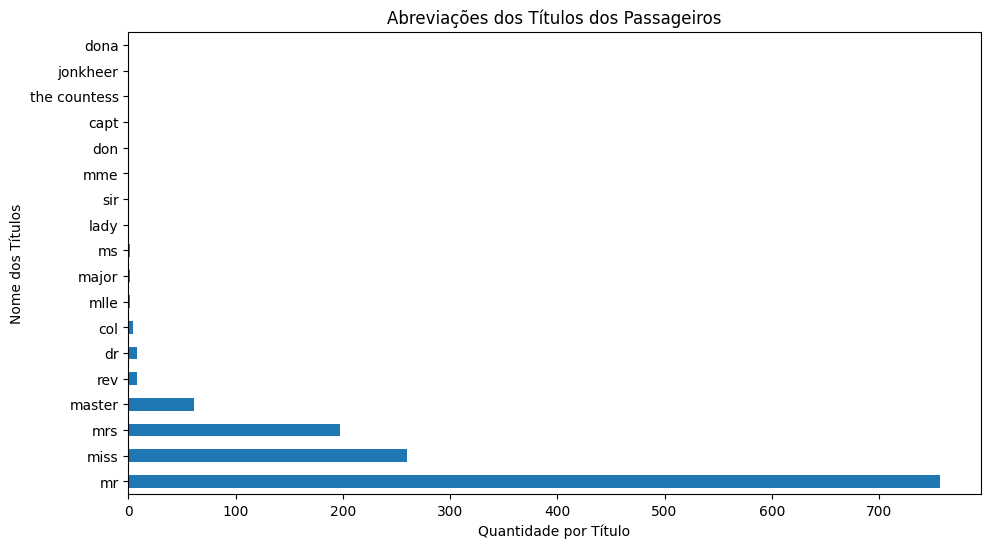

In [51]:
fig = df_titanic['Título'].value_counts().plot.barh(figsize=(11,6))
fig.set_title('Abreviações dos Títulos dos Passageiros')
fig.set_ylabel('Nome dos Títulos')
fig.set_xlabel('Quantidade por Título')

df_titanic['Título'].value_counts()

- Conforme o grafico acima, temos varios titulos
- Vamos investigar os outliers como ja identificamos acima nas variaeis Age e Fare. Para isso, vamos utilizar o boxplot.

In [52]:
df_titanic.loc[31]

PassengerId                                                32
Survived                                                    1
Pclass                                                      1
Name           Spencer, Mrs. William Augustus (Marie Eugenie)
Sex                                                    female
Age                                                       NaN
SibSp                                                       1
Parch                                                       0
Ticket                                               PC 17569
Fare                                                1.465.208
Cabin                                                     B78
Embarked                                                    C
Título                                                    mrs
Name: 31, dtype: object

In [53]:
df_titanic[df_titanic['Fare'].isnull()].shape[0]

0

In [54]:
df_titanic['Fare'] = pd.to_numeric(df_titanic['Fare'], errors='coerce')

In [55]:
df_titanic[df_titanic['Fare'].isnull()].shape[0]

35

<Axes: >

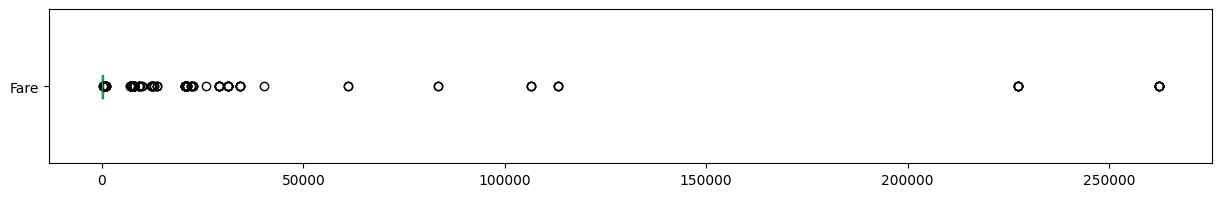

In [56]:
df_titanic['Fare'].plot.box(vert=False, figsize=(15,2))

In [57]:
df_titanic['Fare'].fillna(0, inplace=True)
df_titanic[df_titanic['Fare'].isnull()].shape[0]

0

<Axes: >

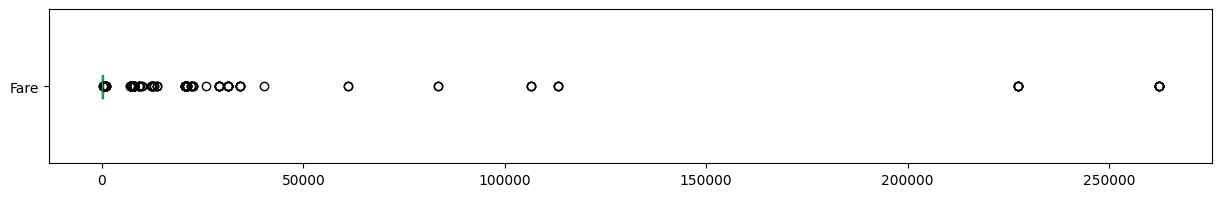

In [58]:
df_titanic['Fare'].plot.box(vert=False, figsize=(15,2))

- Como ja esperado, diversos Outiliers
- Para a coluna Fare, a quantidade de outliers e tao grande que nao conseguimos visualizar o box. Portanto, vmaos filtrar por Fare menor que 500.

<Axes: >

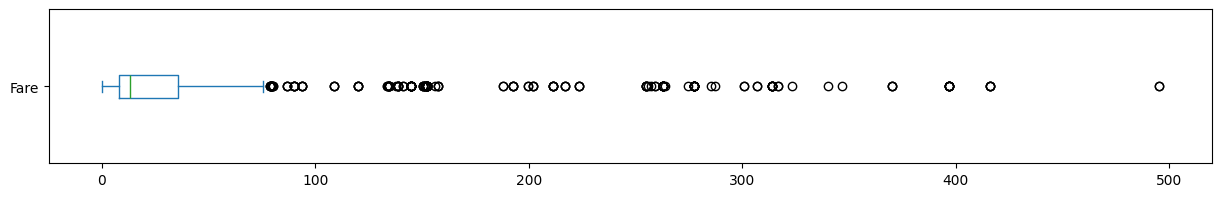

In [59]:
df_titanic['Fare'].loc[df_titanic['Fare'] < 500].plot.box(vert=False, figsize=(15, 2))

- Analisando a distribuição das variaveis para descobrir se eleas sao guassianas (normais) ou distorcidas (assimetricas)

<Axes: >

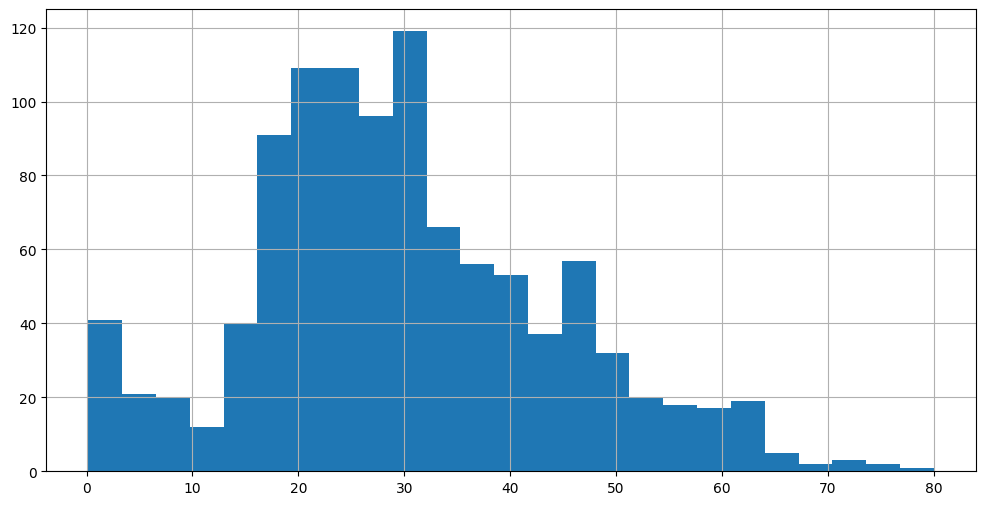

In [60]:
df_titanic['Age'].hist(bins = 25, figsize=(12,6))

<Axes: >

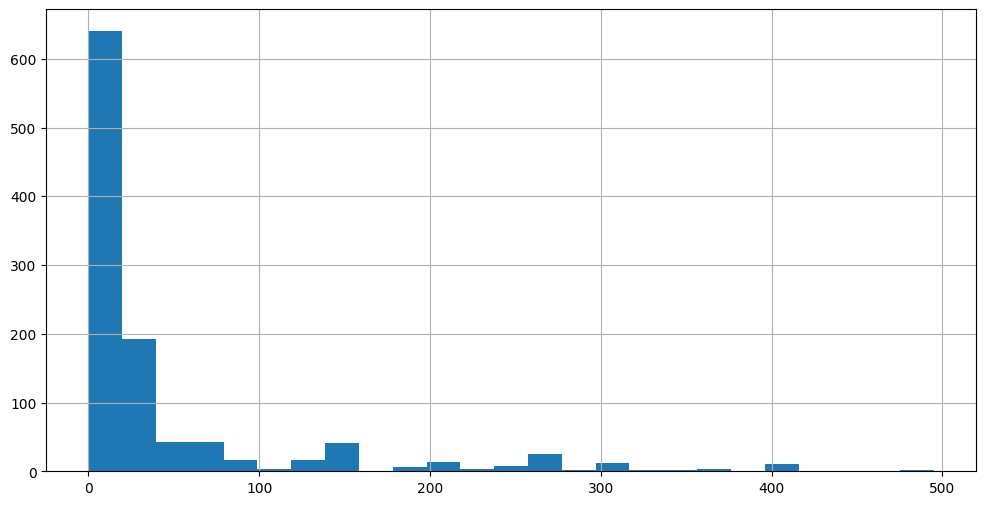

In [61]:
df_titanic['Fare'].loc[df_titanic['Fare'] < 500].hist(bins = 25, figsize=(12,6))

- Vamos ver a distribuição de pessoas por tipo de classe de passagem

<Axes: ylabel='Pclass'>

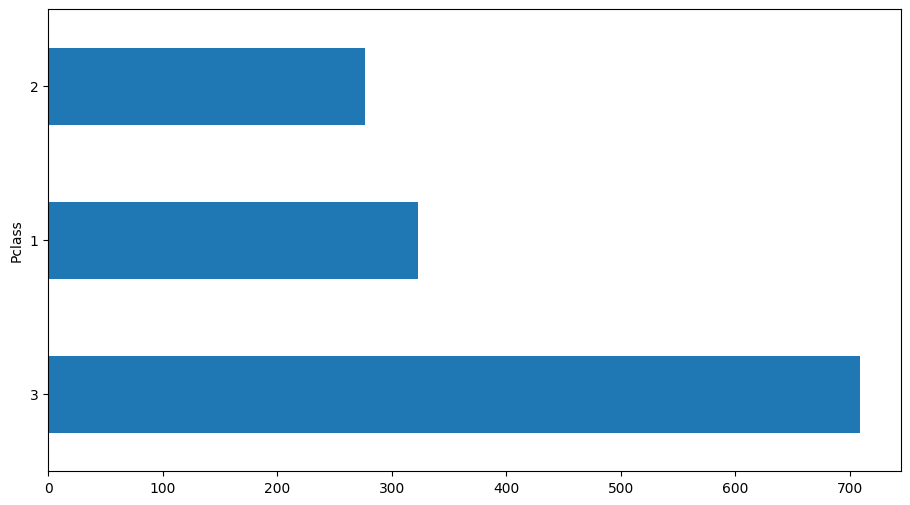

In [62]:
df_titanic['Pclass'].value_counts().plot.barh(figsize=(11,6))

- Vamos indetificar qual o nosso threshold de valor da passagem pago apenas pelos passageiros da Primeira Classe

In [63]:
df_titanic.loc[df_titanic['Fare'] > 10000].groupby(['Pclass','Fare'])[['PassengerId']].count()

PassengerId
Pclass Fare                 
1      25925.0             1
       40125.0             1
       61175.0             2
       83475.0             2
       106425.0            3
       113275.0            3
       227525.0            5
       262375.0            7
2      12275.0             1
       12525.0             1
       12875.0             2
3      12475.0             4
       13775.0             3
       20525.0             3
       20575.0             4
       21075.0             5
       22025.0             3
       22525.0             3
       29125.0             6
       31275.0             7
       34375.0             5

- Podemos perceber que o valor mais alto pago na terceira classe foi de 34375. Ou seja, todo mundo que pagou um valor acima desse esta na primeira classe
- Vamos identificar agora a distribuição das classes das pessoas pelos seus titulos

In [64]:
df_titanic.groupby(['Título','Pclass']).count()

PassengerId  Survived  Name  Sex  Age  SibSp  Parch  \
Título       Pclass                                                        
capt         1                 1         1     1    1    1      1      1   
col          1                 4         4     4    4    4      4      4   
don          1                 1         1     1    0    1      1      1   
dona         1                 1         1     1    1    1      1      1   
dr           1                 6         6     6    6    5      6      6   
             2                 2         2     2    1    2      2      2   
jonkheer     1                 1         1     1    1    1      1      1   
lady         1                 1         1     1    1    1      1      1   
major        1                 2         2     2    2    2      2      2   
master       1                 5         5     5    5    5      5      5   
             2                11        11    11   10   11     11     11   
             3                45        45    45   39   37     45     45   
miss         1                60        60    60   49   59     60     60   
             2                50        50    50   47   48     50     50   
             3               150       150   150  135  103    150    150   
mlle         1                 2         2     2    2    2      2      2   
mme          1                 1         1     1    1    1      1      1   
mr           1               159       159   159  139  132    159    159   
             2               150       150   150  130  137    150    150   
             3               448       448   448  411  312    448    448   
mrs          1                77        77    77   65   67     77     77   
             2                55        55    55   48   54     55     55   
             3                65        65    65   57   49     65     65   
ms           2                 1         1     1    1    1      1      1   
             3                 1         1     1    1    0      1      1   
rev          2                 8         8     8    7    8      8      8   
sir          1                 1         1     1    1    1      1      1   
the countess 1                 1         1     1    1    1      1      1   

                     Ticket  Fare  Cabin  Embarked  
Título       Pclass                                 
capt         1            1     1      1         1  
col          1            4     4      3         4  
don          1            1     1      0         1  
dona         1            1     1      1         1  
dr           1            6     6      4         6  
             2            2     2      0         2  
jonkheer     1            1     1      0         1  
lady         1            1     1      1         1  
major        1            2     2      2         2  
master       1            5     5      5         5  
             2           11    11      3        11  
             3           45    45      1        45  
miss         1           60    60     48        60  
             2           50    50      6        50  
             3          150   150      4       150  
mlle         1            2     2      2         2  
mme          1            1     1      1         1  
mr           1          159   159    120       159  
             2          150   150      7       150  
             3          448   448      8       448  
mrs          1           77    77     66        77  
             2           55    55      7        55  
             3           65    65      3        65  
ms           2            1     1      0         1  
             3            1     1      0         1  
rev          2            8     8      0         8  
sir          1            1     1      1         1  
the countess 1            1     1      1         1

- Todos que estao na terceira classe posuem o titulo de ms, mrs, mr e master. Todos os outros estao na segunda ou primeira classe.

In [65]:
df_titanic.loc[df_titanic['Fare'] > 50000]['Pclass'].value_counts()

Pclass
1    22
Name: count, dtype: int64

- Vamos encontrar a media de preço para os passageiros das primeira, segunda e terceira classe (excluindo os Outliers para nao subir a media)

- 1ª classe

<Axes: >

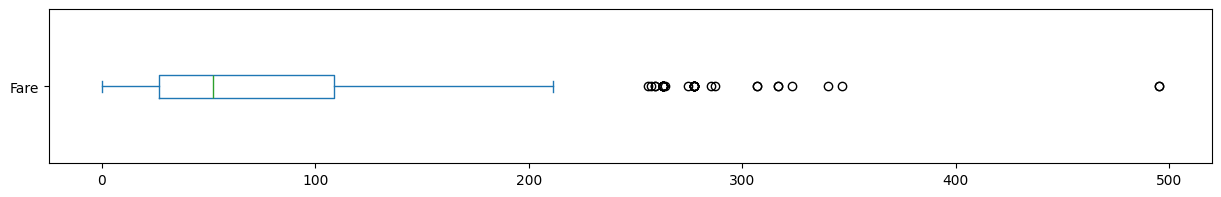

In [66]:
df_titanic['Fare'].loc[(df_titanic['Fare'] < 500) & (df_titanic['Pclass'] == 1)].plot.box(vert=False, figsize=(15,2))

In [67]:
df_titanic['Fare'].loc[(df_titanic['Fare'] < 200) & (df_titanic['Pclass'] == 1)].mean()

46.74849246231156

- 2ª classe

<Axes: >

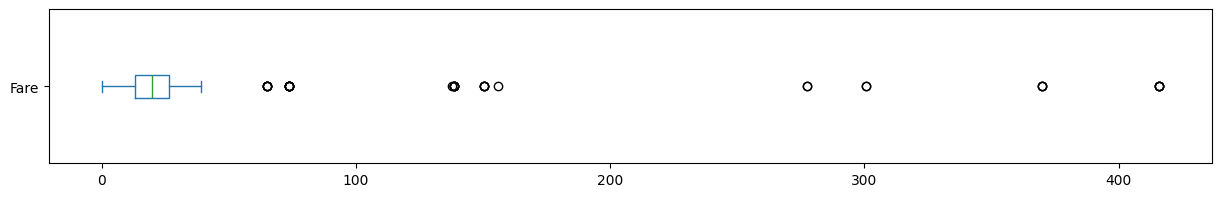

In [68]:
df_titanic['Fare'].loc[(df_titanic['Fare'] < 500) & (df_titanic['Pclass'] == 2)].plot.box(vert=False, figsize=(15,2))

In [69]:
df_titanic['Fare'].loc[(df_titanic['Fare'] < 60) & (df_titanic['Pclass'] == 2)].mean()

18.513946861924687

- 3ª classe

<Axes: >

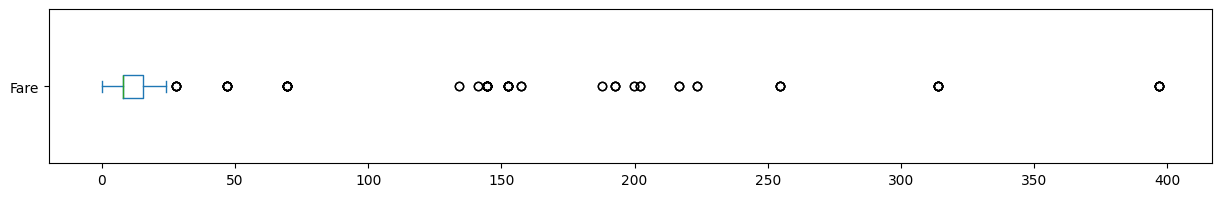

In [70]:
df_titanic['Fare'].loc[(df_titanic['Fare'] < 500) & (df_titanic['Pclass'] == 3)].plot.box(vert=False, figsize=(15,2))

In [71]:
df_titanic['Fare'].loc[(df_titanic['Fare'] < 30) & (df_titanic['Pclass'] == 3)].mean()

9.684363298969071

### Tratando dados ausentes da coluna Sex